# SP LIME

Regression explainer with boston housing prices dataset

In [1]:
from sklearn.datasets import load_boston
import sklearn.ensemble
import sklearn.linear_model
import sklearn.model_selection
import numpy as np
from sklearn.metrics import r2_score

In [2]:
np.random.seed(100)

In [3]:
#load example dataset
boston = load_boston()

In [4]:
#print a description of the variables
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
#train a regressor
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=1000)
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(boston.data, boston.target, train_size=0.80, test_size=0.20)
rf.fit(train, labels_train);

In [6]:
#train a linear regressor
lr = sklearn.linear_model.LinearRegression()
lr.fit(train,labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
#print the R^2 score of the random forest
print("Random Forest R^2 Score: " +str(round(r2_score(rf.predict(test),labels_test),3)))
print("Linear Regression R^2 Score: " +str(round(r2_score(lr.predict(test),labels_test),3)))

Random Forest R^2 Score: 0.864
Linear Regression R^2 Score: 0.56


In [8]:
import lime
import lime.lime_tabular

In [9]:
# generate an "explainer" object
categorical_features  = np.argwhere(np.array([len(set(boston.data[:,x])) for x in range(boston.data.shape[1])]) <= 10).flatten()
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=boston.feature_names, class_names=['price'], categorical_features=categorical_features, verbose=False, mode='regression',discretize_continuous=False)

In [15]:
#generate an explanation
i = 19
exp = explainer.explain_instance(test[i], rf.predict, num_features=14)

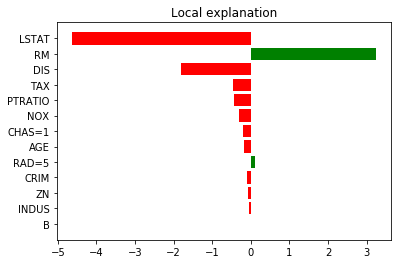

In [16]:
%matplotlib inline
fig = exp.as_pyplot_figure();

In [17]:
print("Input feature names: ")
print(boston.feature_names)
print('\n')

Input feature names: 
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']




In [18]:
print("Input feature values: ")
print(test[i])
print('\n')

Input feature values: 
[   1.51902    0.        19.58       1.         0.605      8.375     93.9
    2.162      5.       403.        14.7      388.45       3.32   ]




In [19]:
print("Predicted: ")
print(rf.predict(test)[i])

Predicted: 
46.5283


# SP-LIME pick step

Maximize the 'coverage' function:<br>

##  $c(V,W,I) = \sum_{j=1}^{d^{\prime}}{\mathbb{1}_{[\exists i \in V : W_{ij}>0]}I_j}$<br>


$W = \text{Explanation Matrix,  } n\times d^{\prime}$<br>

$V = \text{Set of chosen explanations}$<br>

$I = \text{Global feature importance vector,   } I_j = \sqrt{\sum_i{|W_{ij}|}}$<br>

In [20]:
import lime

In [21]:
import warnings
from lime import submodular_pick
sp_obj = submodular_pick.SubmodularPick(explainer, train, rf.predict, sample_size=20, num_features=14, num_exps_desired=5)

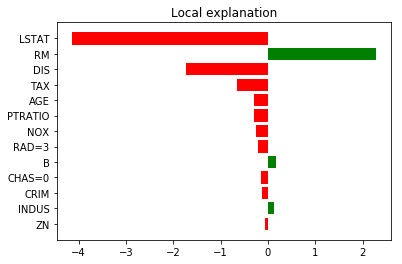

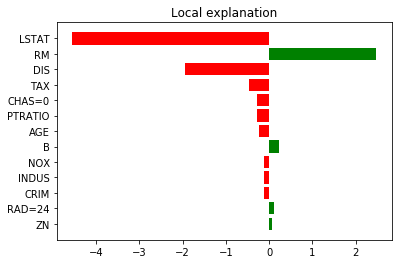

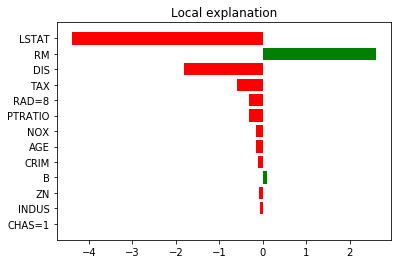

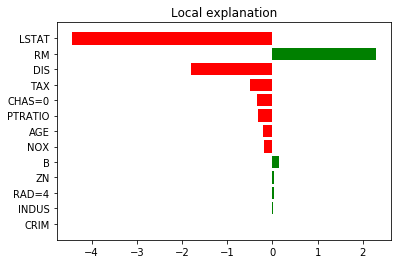

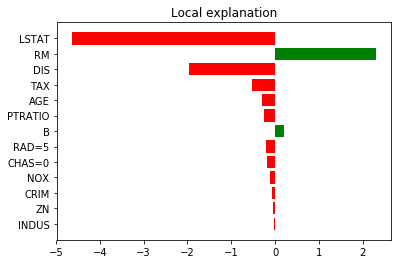

In [22]:
[exp.as_pyplot_figure() for exp in sp_obj.sp_explanations];

In [23]:
import pandas as pd
W=pd.DataFrame([dict(this.as_list()) for this in sp_obj.explanations])

In [24]:
W.head()

,AGE,B,CHAS=0,CHAS=1,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD=24,RAD=3,RAD=4,RAD=5,RAD=6,RAD=7,RAD=8,RM,TAX,ZN
0,-0.351930,0.090842,-0.019798,NaN,-0.074050,-1.308211,0.017637,-4.101481,-0.163953,-0.313455,NaN,0.015936,NaN,NaN,NaN,NaN,NaN,2.895017,-0.495832,0.129614
1,-0.297513,0.118132,-0.177672,NaN,-0.168182,-1.626719,0.049508,-4.251875,-0.087492,-0.330440,NaN,0.159901,NaN,NaN,NaN,NaN,NaN,2.299980,-0.582362,-0.050437
2,-0.312217,0.139535,0.068365,NaN,-0.053875,-1.548972,-0.066702,-4.048689,-0.069395,-0.251731,NaN,-0.217636,NaN,NaN,NaN,NaN,NaN,2.519128,-0.641214,-0.075010
3,-0.308761,0.291487,-0.100765,NaN,-0.178450,-2.096572,0.031170,-4.435489,-0.121612,-0.273185,NaN,NaN,NaN,NaN,-0.10359,NaN,NaN,2.126336,-0.495579,-0.065266
4,-0.249481,0.112304,0.041812,NaN,-0.259958,-1.865427,0.109295,-4.682192,-0.294242,-0.408271,0.335003,NaN,NaN,NaN,NaN,NaN,NaN,2.557929,-0.302038,0.015472


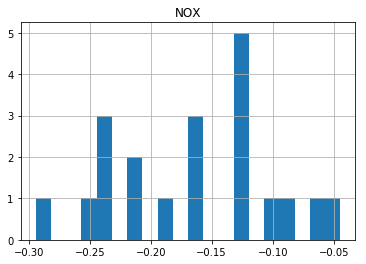

In [25]:
im=W.hist('NOX',bins=20)

## Text explainer using the newsgroups data

In [26]:
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from __future__ import print_function

In [27]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.os.ms-windows.misc','comp.sys.mac.hardware']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['windows', 'mac']

In [28]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

In [29]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train_vectors, newsgroups_train.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='binary')

0.91919191919191912

In [31]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)

In [32]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [38]:
idx = 79
exp = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(mac) =', c.predict_proba([newsgroups_test.data[idx]])[0,1])
print('True class: %s' % class_names[newsgroups_test.target[idx]])

D:\Installed\Continuum\anaconda3\envs\tensorflowpy3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Document id: 79
Probability(mac) = 0.394
True class: windows


In [39]:
sp_obj = submodular_pick.SubmodularPick(explainer, newsgroups_test.data, c.predict_proba, sample_size=2, num_features=6,num_exps_desired=2)

D:\Installed\Continuum\anaconda3\envs\tensorflowpy3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


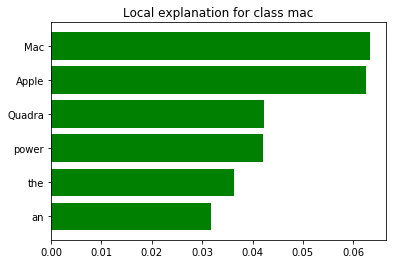

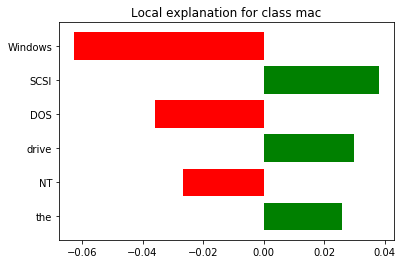

In [40]:
[exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in sp_obj.sp_explanations];

In [41]:
import pandas as pd
Wn=pd.DataFrame([dict(this.as_list()) for this in sp_obj.explanations])

In [42]:
Wn.head()

,Apple,DOS,Mac,NT,Quadra,SCSI,Windows,an,drive,power,the
0,0.062572,NaN,0.063313,NaN,0.042365,NaN,NaN,0.031796,NaN,0.042086,0.036366
1,NaN,-0.03595,NaN,-0.02657,NaN,0.038024,-0.062567,NaN,0.029739,NaN,0.025986


# Text explainer using the Iris data

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier

In [46]:
iris=load_iris()

In [47]:
Xtrain,Xtest,ytrain,ytest=tts(iris.data,iris.target,test_size=.2)

In [48]:
rf=RandomForestClassifier()
rf.fit(Xtrain,ytrain)
rf.score(Xtest,ytest)

0.90000000000000002

In [49]:
explainer = lime.lime_tabular.LimeTabularExplainer(Xtrain, 
                                                   feature_names=iris.feature_names,
                                                   class_names=iris.target_names, 
                                                   verbose=False, 
                                                   mode='classification',
                                                   discretize_continuous=False)

In [50]:
exp=explainer.explain_instance(Xtrain[i],rf.predict_proba,top_labels=3)
exp.available_labels()

[2, 1, 0]

In [51]:
sp_obj = submodular_pick.SubmodularPick(data=Xtrain,explainer=explainer,num_exps_desired=5,predict_fn=rf.predict_proba, sample_size=20, num_features=4, top_labels=3)

In [52]:
import pandas as pd

In [53]:
df=pd.DataFrame({})

In [54]:
for this_label in range(3):
    dfl=[]
    for i,exp in enumerate(sp_obj.sp_explanations):
        l=exp.as_list(label=this_label)
        l.append(("exp number",i))
        dfl.append(dict(l))
    dftest=pd.DataFrame(dfl)
    df=df.append(pd.DataFrame(dfl,index=[iris.target_names[this_label] for i in range(len(sp_obj.sp_explanations))]))

In [55]:
df

,exp number,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
setosa,0,-0.172834,-0.090150,-0.010321,0.001142
setosa,1,-0.200180,-0.122325,-0.007804,-0.000237
setosa,2,-0.291238,-0.131178,-0.017850,0.010798
setosa,3,-0.301831,-0.150588,-0.024412,0.005833
setosa,4,-0.125896,-0.080238,-0.007582,0.003000
versicolor,0,-0.090293,-0.144014,-0.025449,0.008475
versicolor,1,-0.049921,-0.070305,-0.028795,0.004112
versicolor,2,0.139487,-0.005247,-0.004126,-0.015789
versicolor,3,0.156786,0.036237,0.006380,-0.005437
versicolor,4,-0.156424,-0.161460,-0.033670,0.010505
